In [1]:
import numpy as np
import h5py
from utils import save_h5, load_h5, mask_array
import os
import matplotlib.pyplot as plt
from metric import IntersectionOverUnion, DiceIndex, clDice


In [2]:
#Indicate key
my_key = 'Ale_212'

#Open predictions
save_name = "prediction_"+my_key+".h5"
save_directory = '/group/dl4miacourse/The_Segmenters/Predictions/' + save_name
predictions = load_h5(save_directory)


<class 'numpy.ndarray'>
(12, 512, 512)


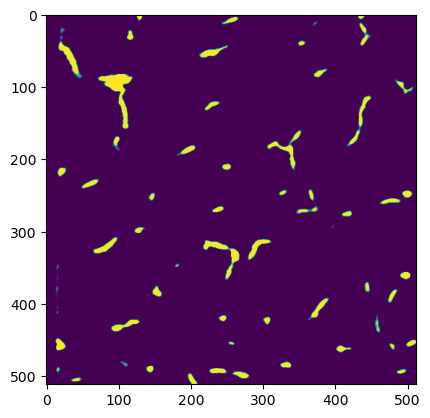

In [3]:
#Print predictions type, shape, unique values and print an example
print(type(predictions))
print(predictions.shape)
np.unique(predictions)
plt.imshow(predictions[1,...])


(array([3.036823e+06, 5.942000e+03, 3.832000e+03, 3.002000e+03,
        2.806000e+03, 2.562000e+03, 2.766000e+03, 3.222000e+03,
        4.896000e+03, 7.987700e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

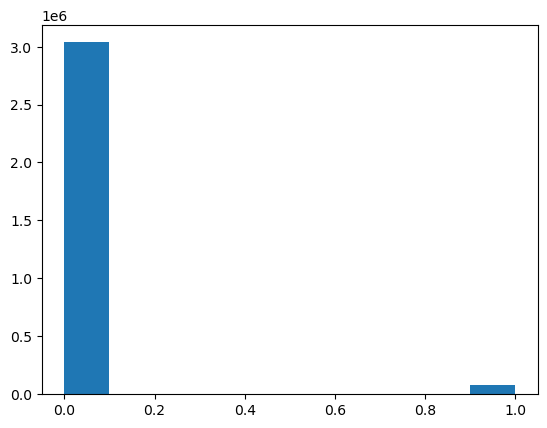

In [4]:
#Print predictions histogram
plt.hist(predictions.flatten())

In [5]:
#Mask predictions and save results
mask_save_file_directory = "/group/dl4miacourse/The_Segmenters/Masks/"+my_key
mask_predictions = mask_array(predictions, threshold=0.5, mask_values=(1,0), output_dtype=np.uint8, saving_folder=mask_save_file_directory, saving_key=my_key)
#mask_predictions = mask_array(predictions, threshold=0.5)
print(mask_predictions.shape)
print(np.unique(mask_predictions))


Done writing to h5
(12, 512, 512)
[0 1]


In [6]:
#Open ground truth
gt = load_h5('/group/dl4miacourse/The_Segmenters/Data/test_label.h5')
print(type(gt))
print(gt.shape)
print(np.unique(gt))
print(gt.dtype)

<class 'numpy.ndarray'>
(12, 512, 512)
[0 1]
uint16


In [7]:
#IoU Metric
metric = IntersectionOverUnion(mask_predictions, gt)
val_metr=metric.forward()
print(val_metr)
#print(metric)

0.787735801286083


In [8]:
#Dice Metric
metricDice = DiceIndex(mask_predictions, gt)
dice_val_metr=metricDice.forward()
print(dice_val_metr)
#print(metric)

0.8812664608712227


In [9]:
#cldice Metric
metric_clDice = clDice(mask_predictions, gt)
print(metric_clDice)
#print(metric)

0.9240322120726443


/localscratch/miniforge3/envs/segmentation/lib/python3.10/site-packages/skimage/util/dtype.py:549: UserWarning: Downcasting uint16 to uint8 without scaling because max value 1 fits in uint8
  return _convert(image, np.uint8, force_copy)
